# Reading in a short story as text sample into python

## Step 1: Creating Tokens

In [1]:
# Opening Dataset
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of character:", len(raw_text))
print(raw_text[:99]) # prints the first 100 char of this file

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


### When working with LLMS millions and thousands of books are used, but today we are using only one books just to practice and understand better

In [2]:
import re # Splits text to obtain token list, splits any given text based on the whitespaces within the text or any other char

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text) # the '\s' splits text wherever white spaces are encountered, into individual tokens

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


### Now lets modify the regular expression splits on whitespaces '(\s)' and change it to also split where the comma and period to be included as individual splits

In [3]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


### Now that the commas, periods are also included as its own token we can now remove also the whitespace 

In [4]:
# Removing whitespaces completely from the sentence
result = [item for item in result if item.strip()] #item.strip() will return true if char in sentence or false for none (Whitespaces will not be returned due to being false)
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


When developing a simple tokenizer, whether we should encode whitespaces as
separate characters or just remove them depends on our application and its
requirements. Removing whitespaces reduces the memory and computing
requirements. However, keeping whitespaces can be useful if we train models that
are sensitive to the exact structure of the text (for example, Python code, which is
sensitive to indentation and spacing). Here, we remove whitespaces for simplicity
and brevity of the tokenized outputs. Later, we will switch to a tokenization scheme
that includes whitespaces.

### Lets include more char for separate tokens

In [5]:
text = "Hello, world. Is this-- a test?"

# The following two lines of codes are our tokenization scheme
result = re.split(r'([,.:;?_!"()\']|--|\s)', text) # Splits texts depending on char
result = [item.strip() for item in result if item.strip()] # Remove whitespaces

print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


### Now lets apply these two statements of the tokenization scheme into the 'raw_text'

In [6]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]

print(preprocessed[:30]) # prints first 30 char. from file
print("Token Length:", len(preprocessed))

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']
Token Length: 4690


Currently our tokens are not in numerical representation rather still in words/char representations. 
Next step will be doing **Vocabulary**.

The Vocabulary contains unique tokens and token IDs. Should be mapped in alphabetical order. 

## Step 2: Creating Token IDs

In the previous section, we tokenized Edith Wharton's short story and assigned it to a
Python variable called preprocessed. Let's now create a list of all unique tokens and sort
them alphabetically to determine the vocabulary size:

In [7]:
# Sorting the set in alphabetical order
all_words = sorted(set(preprocessed))

# Print Vocab size
vocab_len = len(all_words)
print("Size of Vocab:", vocab_len)

Size of Vocab: 1130


We can see that the vocab size is 1130, indicating that it is less than the size of the *tokens*, which was expected as the vocab size only includes *unique tokens/words*!

Remember that a vocab consists of a dictionary of tokens and its associate token IDs

After determining that the vocabulary size is 1,130 via the above code, we create the vocabulary and print its first 51 entries for illustration purposes:

In [8]:
# we will assign an integer values to all the words in vocab (create a token id)
vocab = {token: integer for integer, token in enumerate(all_words)}

# printing a visual representation of how the tokens are being assigned
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


As we can see, based on the output above, the dictionary contains individual tokens associated with unique integer labels. Later in this book, when we want to convert the outputs of an LLM from numbers back into text, we also need a way to turn token IDs into text. For this, we can create an inverse version of the vocabulary that maps token IDs back to corresponding text tokens.


- Let's implement a complete tokenizer class in Python.

    - The class will have an encode method that splits text into tokens and carries out the string-to-integer mapping to produce token IDs via the vocabulary. 

    - In addition, we implement a decode method that carries out the reverse integer-to-string mapping to convert the token IDs back into text.
- Step 1: Store the vocabulary as a class attribute for access in the encode and decode methods

- Step 2: Create an inverse vocabulary that maps token IDs back to the original text tokens

- Step 3: Process input text into token IDs

- Step 4: Convert token IDs back into text

- Step 5: Replace spaces before the specified punctuation

In [9]:
class SimpleTokenizerV1:
    # this init method is called by default when called upon this class 'SimpleTokenizerV1', with the arguments which takes vocab
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s, i in vocab.items()} # take the token and token_id in vocab and flip it, used for decoder method

    # Exact same preprocessing text is introduced as done before for 'Encoder'
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]

        # converting individual token to token ids
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    # we are using the reversed dictionary(int_to_str), and converting the token_id to individual tokens, then joining the individual tokens together
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;"()\'])', r'\1', text) # getting rid of all the spaces before the punctuations to make a complete sentence
        return text


### Let's instantiate a new tokenizer object from the SimpleTokenizerV1 class and tokenize a passage from Edith Wharton's short story to try it out in practice:

In [10]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""

ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


### Next, let's see if we can turn these token IDs back into text using the decode method:

In [11]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

The text that was implemented in 'text' was used from the training set the "raw_text"

### Let's now apply it to a new text sample that is not contained in the training set:

In [12]:
text = "Hello do you like Tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

### An error is printed due to hello not being used in the 'vocab', which is the short story (raw_text). This highlights the need to consider large and diverse training sets to extend the vocabulary when working on LLMs. To deal with this issue we add special context tokens. 

## ADDING SPECIAL CONTEXT TOKENS

- In this section, we will modify this tokenizer to handle unknown
words.

- In particular, we will modify the vocabulary and tokenizer we implemented in the
previous section, SimpleTokenizerV2, to support two new tokens, <|unk|> and
<|endoftext|>

- We can modify the tokenizer to use an <|unk|> token if it
encounters a word that is not part of the vocabulary. 

- Furthermore, we add a token between
unrelated texts. 

- For example, when training GPT-like LLMs on multiple independent
documents or books, it is common to insert a token before each document or book that
follows a previous text source

- When working with multiple text sources, we add <|endoftext|> tokens between these texts. These tokens act as markers, signaling the start and end of a particular segment. This leads to more effective processing and understanding by the LLMs.
  - if this token was not there it would join all text and mix everything up.

### Now lets modify the vocabulary to include these two special tokens, <|unk|> and <|endoftext|>, by adding these to the list of all unique words that we created in the previous section:


In [13]:
all_tokens = sorted(list(set(preprocessed)))

# to add the new tokens use the .extend
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer, token in enumerate(all_tokens)}

len(vocab.items())
for i, item in enumerate(list(vocab.items()) [-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


### Now lets update the SimpleTokenizer in our second version by replacing unknown words and spaces before the specified punctuations


In [14]:
class SimpleTokenizerV2:
    # Remains the same
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]

        # If not presented in vocab the token will be ID as unknown
        preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]

        # converting individual token to token ids
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    # Stays the same
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.:;"()\'])', r'\1', text) # getting rid of all the spaces before the punctuations to make a complete sentence
        return text

In [15]:
tokenizer = SimpleTokenizerV2(vocab)

# Splitting text source like done in GPT
text1 = "Hello, do you like Tea?"
text2 = "In the sunlit terraces of the palace."

text = "<|endoftext|>".join((text1,text2))

print(text)

Hello, do you like Tea?<|endoftext|>In the sunlit terraces of the palace.


In [16]:
# No more errors due to dealing with unkown char
print(tokenizer.encode(text))
tokenizer.decode(tokenizer.encode(text))

[1131, 5, 355, 1126, 628, 1131, 10, 1131, 988, 956, 984, 722, 988, 1131, 7]


'<|unk|>, do you like <|unk|> ? <|unk|> the sunlit terraces of the <|unk|>.'


So far, we have discussed tokenization as an essential step in processing text as input to
LLMs. Depending on the LLM, some researchers also consider additional special tokens such
as the following:

[BOS] (beginning of sequence): This token marks the start of a text. It
signifies to the LLM where a piece of content begins.

[EOS] (end of sequence): This token is positioned at the end of a text,
and is especially useful when concatenating multiple unrelated texts,
similar to <|endoftext|>. For instance, when combining two different
Wikipedia articles or books, the [EOS] token indicates where one article
ends and the next one begins.

[PAD] (padding): When training LLMs with batch sizes larger than one,
the batch might contain texts of varying lengths. To ensure all texts have
the same length, the shorter texts are extended or "padded" using the
[PAD] token, up to the length of the longest text in the batch.

Note that the tokenizer used for GPT models does not need any of these tokens mentioned
above but only uses an <|endoftext|> token for simplicity

the tokenizer used for GPT models also doesn't use an <|unk|> token for outof-vocabulary words. Instead, GPT models use a byte pair encoding tokenizer, which breaks
down words into subword units

### BYTE PAIR ENCODING (BPE)




In [17]:
# ! pip3 install tiktoken

In [18]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.12.0


In [19]:
tokenizer = tiktoken.get_encoding("gpt2")

The usage of this tokenizer is similar to SimpleTokenizerV2 we implemented previously via an encode method, but in one line in code from the tiktoken library:

In [20]:
text = ("Hello, do you like tea? <|endoftext|> In the sunlit terraces"
        "of someunkownPlace.") # tokenizer is able to tokenize random words like this OOV and does not give error as before

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"}) # <|endoftext|> is part of GPT2 or GPT3
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 2954, 593, 27271, 13]


Now we can also decode the sentence back

In [21]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunkownPlace.



We can make two noteworthy observations based on the token IDs and decoded text
above. 

- **First**, the <|endoftext|> token is assigned a relatively large token ID, namely,50256. 
    - In fact, the BPE tokenizer, which was used to train models such as GPT-2, GPT-3, and the original model used in ChatGPT, has a total vocabulary size of 50,257, with <|endoftext|> being assigned the largest token ID.
    
- **Second**, the BPE tokenizer above encodes and decodes unknown words, such as "someunknownPlace" correctly. 
    - The BPE tokenizer can handle any unknown word. How does it achieve this without using <|unk|> tokens?
- The algorithm underlying BPE breaks down words that aren't in its predefined vocabulary into smaller subword units or even individual characters.

 - The enables it to handle out-ofvocabulary words. 

- So, thanks to the BPE algorithm, if the tokenizer encounters an unfamiliar word during tokenization, it can represent it as a sequence of subword tokens or characters

In [22]:
integers = tokenizer.encode("AKwire ier") # random words
print(integers)

string = tokenizer.decode(integers)
print(string)

# Still able to encode and decode very well

[10206, 21809, 220, 959]
AKwire ier


### Creating Input-Target Pairs


In this section we implement a data loader that fetches the input-target pairs using a sliding window approach

To get started, we will first tokenize the whole The Verdict short story we worked with earlier using the BPE tokenizer introduced in the previous section

In [23]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


Next, we remove the first 50 tokens from the dataset for demonstration purposes as it
results in a slightly more interesting text passage in the next steps:

In [24]:
enc_sample = enc_text[50:]

One of the easiest and most intuitive ways to create the input-target pairs for the nextword prediction task is to create two variables, x and y, where x contains the input tokens
and y contains the targets, which are the inputs shifted by 1:

In [25]:
context_size = 4 #length of the input
#The context_size of 4 means that the model is trained to look at a sequence of 4 words (or tokens)
#to predict the next word in the sequence.
#The input x is the first 4 tokens [1, 2, 3, 4], and the target y is the next 4 tokens [2, 3, 4, 5]

x = enc_sample[:context_size]
y = enc_sample[1:context_size + 1]

print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


Processing the inputs along with the targets, which are the inputs shifted by one position, we can then create the next-word prediction tasks as follows:

In [26]:
for i in range(1, context_size + 1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "----->", desired)

[290] -----> 4920
[290, 4920] -----> 2241
[290, 4920, 2241] -----> 287
[290, 4920, 2241, 287] -----> 257


Everything left of the arrow (---->) refers to the input an LLM would receive, and the token
ID on the right side of the arrow represents the target token ID that the LLM is supposed to
predict.

For illustration purposes, let's repeat the previous code but convert the token IDs into
text:

In [27]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


There's only one more task before we can turn the tokens into embeddings:implementing an efficient data loader that
iterates over the input dataset and returns the inputs and targets as PyTorch tensors, which
can be thought of as multidimensional arrays.

In particular, we are interested in returning two tensors: an input tensor containing the
text that the LLM sees and a target tensor that includes the targets for the LLM to predict,
    

### Implementing Data Loader

For the efficient data loader implementation, we will use PyTorch's built-in Dataset and
DataLoader classes.

    
Step 1: Tokenize the entire text
    
Step 2: Use a sliding window to chunk the book into overlapping sequences of max_length

Step 3: Return the total number of rows in the dataset

Step 4: Return a single row from the dataset

In [28]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        # This part is defining the input output tensor
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)


    # Based on the index that we provide it just return the that particular row of the input
    # as well as the particular row if the output/target tensor
    # This is a map dataset so we must include this as well
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]



The GPTDatasetV1 class in listing 2.5 is based on the PyTorch Dataset class.

It defines how individual rows are fetched from the dataset. 

Each row consists of a number of
token IDs (based on a max_length) assigned to an input_chunk tensor. 

The target_chunk
tensor contains the corresponding targets. 

Now the following code will use the GPTDatasetV1 to load the inputs in batches via a PyTorch
DataLoader

Step 1: Initialize the tokenizer

Step 2: Create dataset

Step 3: drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes
during training

Step 4: The number of CPU processes to use for preprocessing

In [29]:
# This function is very important and will help create the input output data pairs
def create_dataloader_v1(txt, # Text file (dataset that we have)
                         batch_size=4, # How many batches to run in parallel
                         max_length=256, # Basically equal to the context length (GPT2 or 3 use this size during training)
                         stride=128, # When we create input output batches, the stride is how much we need to skip before we create the next batch
                         shuffle=True, # Shuffle dataset
                         drop_last=True, #
                         num_workers=0 # parallel processing on CPU batch that we can run simulataneausly
                         ):

    # Initialize the tokenizer with GPT
    tokenizer = tiktoken.get_encoding("gpt2")

    # Creating the dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Creating the DataLoader
    # The DataLoader will be checking the '__getitem__' method in the GPTDatasetV1 class
    # it will return the input output pair based on what is mentioned in the '__getitem__'
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

Let's test the dataloader with a batch size of 1 for an LLM with a context size of 4, 

This will develop an intuition of how the GPTDatasetV1 class and the
create_dataloader_v1 function work together:

In [30]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

Convert dataloader into a Python iterator to fetch the next entry via Python's built-in next() function
    

In [31]:
import torch
print("Pytorch Version:", torch.__version__)

dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch) # Input output pair


Pytorch Version: 2.2.2
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


The first_batch variable contains two tensors: the first tensor stores the input token IDs,
and the second tensor stores the target token IDs. 

Since the max_length is set to 4, each of the two tensors contains 4 token IDs. 

Note that an input size of 4 is relatively small and only chosen for illustration purposes. It is common to train LLMs with input sizes of at least
256.

More stride means it moves over more spaces!

To illustrate the meaning of stride=1, let's fetch another batch from this dataset: 

In [32]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]



If we compare the first with the second batch, we can see that the second batch's token
IDs are shifted by one position compared to the first batch. 

For example, the second ID in
the first batch's input is 367, which is the first ID of the second batch's input. 

The stride
setting dictates the number of positions the inputs shift across batches, emulating a sliding
window approach


Batch sizes of 1, such as we have sampled from the data loader so far, are useful for
illustration purposes. 
                                                                                 
If you have previous experience with deep learning, you may know
that small batch sizes require less memory during training but lead to more noisy model
updates.

Just like in regular deep learning, the batch size is a trade-off and hyperparameter
to experiment with when training LLMs.

    
Before we move on to the two final sections of this chapter that are focused on creating
the embedding vectors from the token IDs, let's have a brief look at how we can use the
data loader to sample with a batch size greater than 1:

In [33]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print(f"Input\n: {inputs}")
print(f"\nTargets\n: {targets}")

Input
: tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets
: tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


Note that we increase the stride to 4. This is to utilize the data set fully (we don't skip a
single word) but also avoid any overlap between the batches, since more overlap could lead
to increased overfitting.

## Creating Token Embedding

In [34]:
input_ids = torch.tensor([2, 3, 5, 1])

    
For the sake of simplicity and illustration purposes, suppose we have a small vocabulary of
only 6 words (instead of the 50,257 words in the BPE tokenizer vocabulary), and we want
to create embeddings of size 3 (in GPT-3, the embedding size is 12,288 dimensions):

Using the vocab_size and output_dim, we can instantiate an embedding layer in PyTorch,
setting the random seed to 123 for reproducibility purposes:


In [35]:
vocab_size = 6
output_dim = 3

# Random
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

# Prints the embedding matrix
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


    
We can see that the weight matrix of the embedding layer contains small, random values.
These values are optimized during LLM training as part of the LLM optimization itself, as we
will see in upcoming chapters. Moreover, we can see that the weight matrix has six rows
and three columns. There is one row for each of the six possible tokens in the vocabulary.
And there is one column for each of the three embedding dimensions.
    
After we instantiated the embedding layer, let's now apply it to a token ID to obtain the
embedding vector:

In [36]:
# Getting vector for token IDs, all we do is LOOKUP the Token ID number
# Thats why its called a LOOKUP table for the torch.nn.Embedding()
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


If we compare the embedding vector for token ID 3 to the previous embedding matrix, we
see that it is identical to the 4th row (Python starts with a zero index, so it's the row
corresponding to index 3). In other words, the embedding layer is essentially a look-up
operation that retrieves rows from the embedding layer's weight matrix via a token ID.
    

Previously, we have seen how to convert a single token ID into a three-dimensional
embedding vector. Let's now apply that to all four input IDs we defined earlier
(torch.tensor([2, 3, 5, 1])):


In [37]:
# Each row in this output matrix is obtained via a lookup operation from the embedding weight matrix
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


### POSITIONAL EMBEDDINGS (ENCODING WORD POSITIONS)


We now consider more realistic and useful embedding sizes and encode the input
tokens into a 256-dimensional vector representation. 

This is smaller than what the original
GPT-3 model used (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable
for experimentation. 

Furthermore, we assume that the token IDs were created by the BPE
tokenizer that we implemented earlier, which has a vocabulary size of 50,257:

In [38]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

Using the token_embedding_layer above, if we sample data from the data loader, we
embed each token in each batch into a 256-dimensional vector. If we have a batch size of 8
with four tokens each, the result will be an 8 x 4 x 256 tensor.

Let's instantiate the data loader ( Data sampling with a sliding window),
first:



In [39]:
max_length = 4 # Only four input token will be used to predict the next word
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print("Token IDs:\n", inputs)
print("\nInputs shape:", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape: torch.Size([8, 4])


    
As we can see, the token ID tensor is 8x4-dimensional, meaning that the data batch
consists of 8 text samples with 4 tokens each.
    
Let's now use the embedding layer to embed these token IDs into 256-dimensional
vectors:

In [40]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


As we can tell based on the 8x4x256-dimensional tensor output, each token ID is now
embedded as a 256-dimensional vector.


For a GPT model's absolute embedding approach, we just need to create another
embedding layer that has the same dimension as the token_embedding_layer:

In [41]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim) # For the token embedding the input size was the vocab size while for positional it is context_length

In [42]:
pos_embeddings = pos_embedding_layer(torch.arange(context_length)) # passing the position is creating the sequence of number until the max length in this case the context length
print(pos_embeddings.shape)

torch.Size([4, 256])


As shown in the preceding code example, the input to the pos_embeddings is usually a
placeholder vector torch.arange(context_length), which contains a sequence of
numbers 0, 1, ..., up to the maximum input length − 1. 

The context_length is a variable
that represents the supported input size of the LLM. 

Here, we choose it similar to the
maximum length of the input text. 

In practice, input text can be longer than the supported
context length, in which case we have to truncate the text.

As we can see, the positional embedding tensor consists of four 256-dimensional vectors.
We can now add these directly to the token embeddings, where PyTorch will add the 4x256-
dimensional pos_embeddings tensor to each 4x256-dimensional token embedding tensor in
each of the 8 batches:

In [43]:
input_embeddings = pos_embeddings + token_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


The input_embeddings we created are the embedded input
examples that can now be processed by the main LLM modules
    

## IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

Consider the following input sentence, which has already been embedded into 3-
dimensional vectors. 

We choose a small embedding dimension for
illustration purposes to ensure it fits on the page without line breaks:



In [44]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

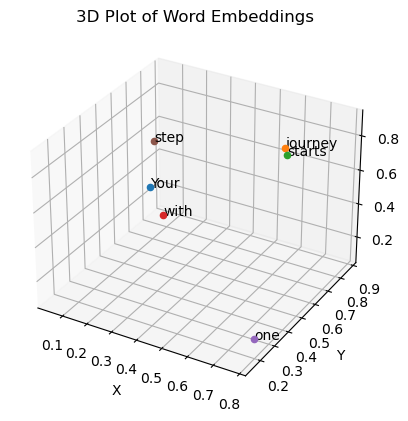

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

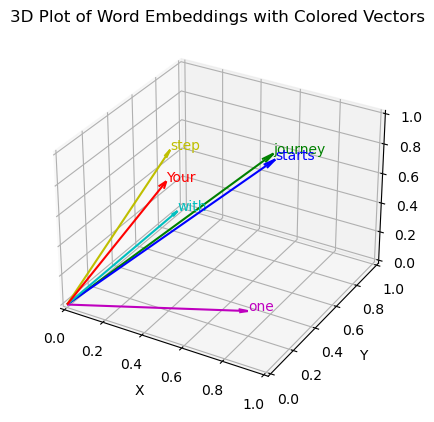

In [46]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


Each row represents a word, and each column represents an embedding dimension

The second input token serves as the query    

In [47]:
query = inputs[1] # 2nd token is the query

attn_scores_2 = torch.empty(inputs.shape[0])
# Loop over the inputs
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i,query) # Dot product ( transpose not necessary)

# Each score is the result of the dot product between every word and the second word to see the relationship
# Remember the higher the dot product the closer the similarity is
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In the next step, we normalize each of the attention scores that
we computed previously.

The main goal behind the normalization  is to obtain attention weights
that sum up to 1. 

This normalization is a convention that is useful for interpretation and for
maintaining training stability in an LLM. 

Here's a straightforward method for achieving this
normalization step:


In [48]:
attn_weights_2_temp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights:", attn_weights_2_temp)
print("Sum:", attn_weights_2_temp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In practice, it's more common and advisable to use the softmax function for normalization.

This approach is better at managing extreme values and offers more favorable gradient
properties during training. 

Below is a basic implementation of the softmax function for
normalizing the attention scores: 

In [49]:
# Without pytorch implementation of softmax
def softmax_naive(x):
    return torch.exp(x)/ torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


As the output shows, the softmax function also meets the objective and normalizes the
attention weights such that they sum to 1:

In addition, the softmax function ensures that the attention weights are always positive.
This makes the output interpretable as probabilities or relative importance, where higher
weights indicate greater importance.

Note that this naive softmax implementation (softmax_naive) may encounter numerical
instability problems, such as overflow and underflow, when dealing with large or small input
values. 

Therefore, in practice, it's advisable to use the PyTorch implementation of softmax,
which has been extensively optimized for performance:

In [50]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In this case, we can see that it yields the same results as our previous softmax_naive
function:

The context vector z(2)is calculated as a weighted sum of all input
vectors. 

This involves multiplying each input vector by its corresponding attention weight:

In [51]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs[:attn_weights_2.shape[0]]):
    context_vec_2 += attn_weights_2[i] * x_i


print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


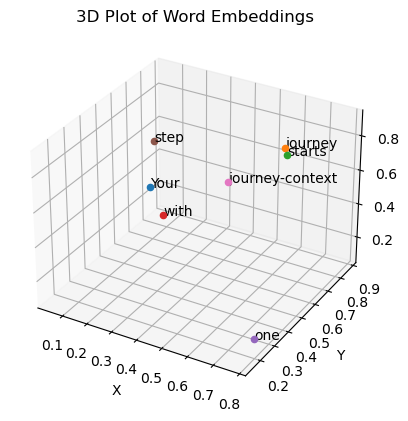

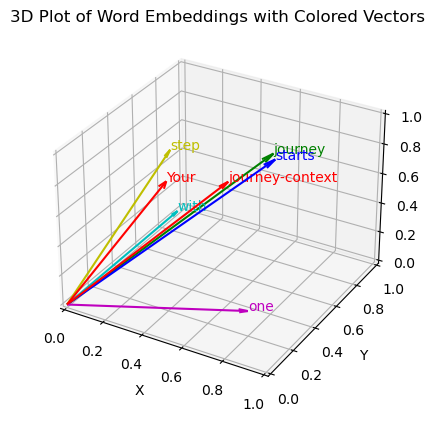

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

Now, we can extend this computation to
calculate attention weights and context vectors for all inputs.

First, we add an additional for-loop to compute the
dot products for all pairs of inputs.

In [53]:
n = len(inputs)   # this is 7
attn_scores = torch.empty(n, n)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


Each element in the preceding tensor represents an attention score between each pair of
inputs.

When computing the preceding attention score tensor, we used for-loops in Python.
                                                            
However, for-loops are generally slow, and we can achieve the same results using matrix
multiplication:


In [54]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


We now normalize each row so that the values in
each row sum to 1:

In [55]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1459],
        [0.1180, 0.2026, 0.1986, 0.1056, 0.0921, 0.1346, 0.1486],
        [0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485],
        [0.1223, 0.1768, 0.1744, 0.1246, 0.1077, 0.1467, 0.1476],
        [0.1305, 0.1675, 0.1689, 0.1169, 0.1607, 0.1108, 0.1446],
        [0.1180, 0.1861, 0.1813, 0.1211, 0.0842, 0.1615, 0.1478],
        [0.1277, 0.1889, 0.1860, 0.1121, 0.1011, 0.1359, 0.1483]])


In the context of using PyTorch, the dim parameter in functions like torch.softmax specifies
the dimension of the input tensor along which the function will be computed. 

By setting
dim=-1, we are instructing the softmax function to apply the normalization along the last
dimension of the attn_scores tensor. 

If attn_scores is a 2D tensor (for example, with a
shape of [rows, columns]), dim=-1 will normalize across the columns so that the values in
each row (summing over the column dimension) sum up to 1.

Let's briefly verify that
the rows indeed all sum to 1:

In [56]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In the third and last step, we now use these attention weights to compute all context
vectors via matrix multiplication:

In [57]:
attn_context_vecs = attn_scores @ inputs

print(attn_context_vecs)

tensor([[2.3309, 3.1930, 3.1231],
        [3.3815, 5.0050, 4.4004],
        [3.3502, 4.9336, 4.3379],
        [1.8429, 2.8403, 2.4459],
        [1.8443, 2.2593, 1.9926],
        [2.2693, 3.7091, 3.2095],
        [2.6958, 3.9670, 3.5178]])


We can double-check that the code is correct by comparing the 2nd row with the context
vector z(2) calculated previously

In [58]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


    
Based on the result, we can see that the previously calculated context_vec_2 matches the
second row in the previous tensor exactly


This concludes the code walkthrough of a simple self-attention mechanism.
    

## IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS

In [59]:

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

Let's begin by defining a few variables:

#A The second input element

#B The input embedding size, d=3

#C The output embedding size, d_out=2


In [60]:
x_2 = inputs[1] # A
d_in = inputs.shape[1] # B
d_out = 2  # C

Note that in GPT-like models, the input and output dimensions are usually the same. 

But for illustration purposes, to better follow the computation, we choose different input (d_in=3)
and output (d_out=2) dimensions here.

Next, we initialize the three weight matrices Wq, Wk and Wv

In [61]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False) # Weight matrix for Query
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)   # Weight matrix for Key
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False) #

In [62]:
print(W_query)
print(W_key)
print(W_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


Note that we are setting requires_grad=False to reduce clutter in the outputs for
illustration purposes. 

If we were to use the weight matrices for model training, we
would set requires_grad=True to update these matrices during model training.

Next, we compute the query, key, and value vectors as shown earlier

In [64]:
# Demonstrating Individual elements
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


    
As we can see based on the output for the query, this results in a 2-dimensional vector. 

This is because: we set the number of columns of the corresponding weight matrix, via d_out, to 2:


Even though our temporary goal is to only compute the one context vector z(2),  we still
require the key and value vectors for all input elements. 

This is because they are involved in computing the attention weights with respect to the query q(2)

We can obtain all keys and values via matrix multiplication:

In [65]:
# Now computing all keys and values via matrix multiplication for inputs
query = inputs @ W_query
key = inputs @ W_key
value = inputs @ W_value
print("keys.shape:", key.shape)
print("values.shape:", value.shape)
print("Query Shape:", query.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
Query Shape: torch.Size([6, 2])


As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D
onto a 2D embedding space:

First, let's compute the attention score ω22

In [66]:
keys_2 = key[1] # A
attn_score_22 = query_2.dot(keys_2)
print("Attention Score ω22:", attn_score_22)

Attention Score ω22: tensor(1.8524)


Again, we can generalize this computation to all attention scores via matrix multiplication:

In [67]:
attn_scores_2 = query_2 @ key.T # Computing all attention scores for query 2
print("Attention Scores for query 2:", attn_scores_2)

Attention Scores for query 2: tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [ ]:
attn_scores = query @ key.T # Computing all attention scores of the inputs, this is omega
print("Attention Scores:\n", attn_scores)

Attention Scores:
 tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


We compute the attention weights by scaling the
attention scores and using the softmax function we used earlier. 

The difference to earlier is
that we now scale the attention scores by dividing them by the square root of the
embedding dimension of the keys. 

Note that taking the square root is mathematically the
same as exponentiating by 0.5:

In [ ]:
# the problem with the attention scores is that they can get very large very quickly
# this can lead to very small gradients during backpropagation making it difficult to train the model
# To mitigate this, we scale the attention scores by the square root of the dimension of the key vectors
# Normalization
d_k = key.shape[-1]  # Dimension of the key vectors
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)  # dim = -1 bc we have to sum up the columns
print("Attention Weights for query 2:", attn_weights_2) # Sums up to one
print(d_k)

Attention Weights for query 2: tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


## WHY DIVIDE BY SQRT (DIMENSION)

Reason 1: For stability in learning

The softmax function is sensitive to the magnitudes of its inputs. When the inputs are large, the differences between the exponential values of each input become much more pronounced. This causes the softmax output to become "peaky," where the highest value receives almost all the probability mass, and the rest receive very little.

In attention mechanisms, particularly in transformers, if the dot products between query and key vectors become too large (like multiplying by 8 in this example), the attention scores can become very large. This results in a very sharp softmax distribution, making the model overly confident in one particular "key." Such sharp distributions can make learning unstable,

In [70]:
# Define the tensor
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

# Apply softmax without scaling
softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling:", softmax_result)

# Multiply the tensor by 8 and then apply softmax
scaled_tensor = tensor * 8
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling (tensor * 8):", softmax_scaled_result)

Softmax without scaling: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor * 8): tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


## BUT WHY SQRT?

Reason 2: To make the variance of the dot product stable

The dot product of  Q and K increases the variance because multiplying two random numbers increases the variance.

The increase in variance grows with the dimension. 

Dividing by sqrt (dimension) keeps the variance close to 1

In [ ]:
import numpy as np

# Function to compute variance before and after scaling
def compute_variance(dim, num_trials=1000):
    dot_products = []
    scaled_dot_products = []

    # Generate multiple random vectors and compute dot products
    for _ in range(num_trials):
        q = np.random.randn(dim)
        k = np.random.randn(dim)

        # Compute dot product
        dot_product = np.dot(q, k)
        dot_products.append(dot_product)

        # Scale the dot product by sqrt(dim)
        scaled_dot_product = dot_product / np.sqrt(dim)
        scaled_dot_products.append(scaled_dot_product)

    # Calculate variance of the dot products
    variance_before_scaling = np.var(dot_products)
    variance_after_scaling = np.var(scaled_dot_products)

    return variance_before_scaling, variance_after_scaling

# For dimension 5
variance_before_5, variance_after_5 = compute_variance(5)
print(f"Variance before scaling (dim=5): {variance_before_5}")
print(f"Variance after scaling (dim=5): {variance_after_5}")

# For dimension 20
variance_before_100, variance_after_100 = compute_variance(100)
print(f"Variance before scaling (dim=100): {variance_before_100}")
print(f"Variance after scaling (dim=100): {variance_after_100}")



Variance before scaling (dim=5): 5.7512358460642625
Variance after scaling (dim=5): 1.1502471692128524
Variance before scaling (dim=100): 103.51008194018914
Variance after scaling (dim=100): 1.0351008194018914


We now compute the context vector as a weighted sum over the value
vectors. 

Here, the attention weights serve as a weighting factor that weighs the respective
importance of each value vector. 

We can use matrix multiplication to
obtain the output in one step:

In [73]:
context_vec_2 = attn_weights_2 @ value
print(context_vec_2)

tensor([0.3061, 0.8210])


So far, we only computed a single context vector, z(2). 

In the next section, we will generalize the code to compute all context vectors in the input sequence, z(1)to z (T)

## IMPLEMENTING A COMPACT SELF ATTENTION PYTHON CLASS

    
In the previous sections, we have gone through a lot of steps to compute the self-attention
outputs. 

This was mainly done for illustration purposes so we could go through one step at
a time. 

In practice, with the LLM implementation in the next chapter in mind, it is helpful to
organize this code into a Python class as follows:

In [83]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__() # Initialize the nn.Module superclass
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        query = x @ self.W_query
        key = x @ self.W_key
        value = x @ self.W_value

        attn_scores = query @ key.T # Omega
        attn_weights = torch.softmax( attn_scores / key.shape[-1] ** 0.5, dim=-1)

        context_vec = attn_weights @ value
        return context_vec


In this PyTorch code, SelfAttention_v1 is a class derived from nn.Module, which is a
fundamental building block of PyTorch models, which provides necessary functionalities for
model layer creation and management.  

The __init__ method initializes trainable weight matrices (W_query, W_key, and
W_value) for queries, keys, and values, each transforming the input dimension d_in to an
output dimension d_out.


During the forward pass, using the forward method, we compute the attention scores
(attn_scores) by multiplying queries and keys, normalizing these scores using softmax.

Finally, we create a context vector by weighting the values with these normalized attention
scores.

In [84]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)



Since inputs contains six embedding vectors, we get a matrix storing the six
context vectors, as shown in the above result. 

As a quick check, notice how the second row ([0.3061, 0.8210]) matches the contents of
context_vec_2 in the previous section.

We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's
nn.Linear layers, which effectively perform matrix multiplication when the bias units are
disabled. 

Additionally, a significant advantage of using nn.Linear instead of manually
implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight
initialization scheme, contributing to more stable and effective model training.

In [88]:
import torch.nn as nn

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__() # Initialize the nn.Module superclass

        # Linear has a more stable initialization scheme than Parameter + rand
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        query = self.W_query(x)
        key = self.W_key(x)
        value = self.W_value(x)

        attn_scores = query @ key.T # Omega
        attn_weights = torch.softmax( attn_scores / key.shape[-1] ** 0.5, dim=-1)

        context_vec = attn_weights @ value
        return context_vec


In [89]:
torch.manual_seed(123)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)


Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they
use different initial weights for the weight matrices since nn.Linear uses a more
sophisticated weight initialization scheme.

## HIDING FUTURE WORDS WITH CAUSAL ATTENTION